# Titanic: Random forests with accuracy >= 90%

    "The RMS Titanic was a British passenger ship operated by the White Star Line and built by the Harland and Wolff shipyards in Belfast. It was the second vessel of the Olympic Class of ocean liners after the RMS Olympic and followed by the HMHS Britannic. Designed by naval engineers Alexander Carlisle and Thomas Andrews, construction began in March 1909 and it was launched into the sea in May 1911. The Titanic was thought to be the most luxurious and safest ship of its time, spawning legends it was supposed to "unsinkable". The vessel left on its maiden voyage from Southampton to New York on April 10, 1912, en route through Cherbourg-Octeville in France and Queenstown in Ireland. It crashed into an iceberg at 11:40 pm on April 14 and sank early in the morning with over 1,500 people on board, making it one of the largest peacetime maritime disasters in history." - https://en.wikipedia.org/wiki/Titanic

In this project, we will use the dataset provided by Kaggle and raise some questions and answer them observing the pattern of the available data. It is important to note that unfortunately we do not have data on all passengers, we only have data on 891 people present on the Titanic.

Importing the libraries: Insert the libraries to be used at the top of your Python code.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To read the dataset, let's execute the command below. Remembering that your file must be saved in the same folder as your Python code.

In [6]:
!pip install seaborn

In [7]:
import seaborn as sns

In [9]:
data1 = pd.read_csv('gender_submission.csv')
data2 = pd.read_csv('test.csv')
data3 = pd.read_csv('train.csv')

We realized that only 342/891 people survived.

In [10]:
Aux = data3['Survived'].value_counts()
print('Sobreviventes:', Aux[1])
print('Mortos       :', Aux[0])

Sobreviventes: 342
Mortos       : 549


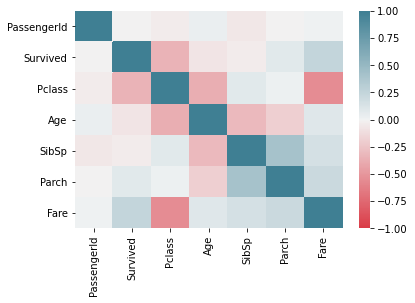

In [11]:
heat_map = sns.heatmap(data3.corr(),vmax=1, vmin=-1, center=0,
            cmap=sns.diverging_palette(10, 220, as_cmap=True))
plt.show()

Through the analysis below we can draw some insights:

The oldest crew member was 80 years old, his name was Mr. Algernon Henry Wilson, he traveled in first class and survived.

    Henry was a Justice of the Peace from Hessle, Yorkshire. He boarded the RMS Titanic at Southampton (Cabin A-23, ticket number 27042, £30).

In [12]:
data3[data3['Age']==data3['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


The youngest crew member was less than 1 year old, his name was Assad Alexander, he traveled in third class and survived.

    Assad (Assed or Essed) Alexander Thomas, born 8 November 1911 in Lebanon, was 5 months of age when he boarded the Titanic. He embarked with his mother and uncle Charles at Cherbourg as a third class passenger.

In [13]:
data3[data3['Age']==data3['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [14]:
Aux2 = data3[data3['Survived']==0]
criancas_mortas = Aux2[Aux2['Age']<=18].reset_index(drop=True)

Analyzing the number of children who survived or died, we realized that there were many children in the third class and that a large number of children in the third class did not survive. In fact, in the first and second classes the number of children killed was much less than the number of children surviving, in the third class the number of children killed was almost double the number of survivors.

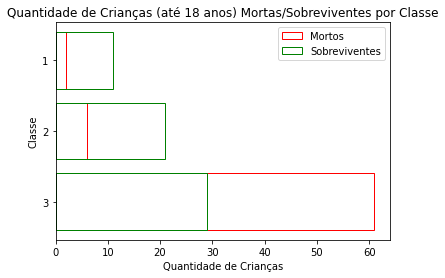

In [15]:
Aux3 = data3[data3['Survived']==1]
criancas_sobreviventes = Aux3[Aux3['Age']<18].reset_index(drop=True)
plt.barh(('3','2','1'),criancas_mortas['Pclass'].value_counts(), edgecolor='r',label='Mortos',color=(0,0,0,0))
plt.barh(('3','2','1'),criancas_sobreviventes['Pclass'].value_counts(), edgecolor='g',label='Sobreviventes',color=(0,0,0,0))
plt.xlabel('Quantidade de Crianças')
plt.ylabel('Classe')
plt.title('Quantidade de Crianças (até 18 anos) Mortas/Sobreviventes por Classe')
plt.legend()
plt.show()

For me, the Titanic metaphor can still be seen: The iceberg is before us and we have been unable to divert the ship from the collision. Although we are all on the same ship together, we know that the poor will be most affected when the ship sinks.

In [16]:
idosos_mortos = Aux2[Aux2['Age']>60].sort_values(by='Age',ascending=False).reset_index(drop=True)

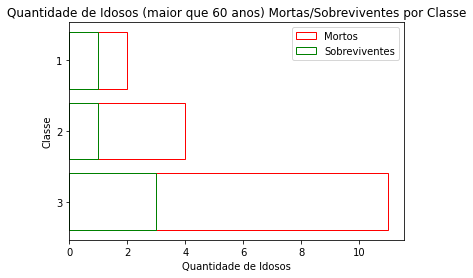

In [17]:
idosos_sobreviventes = Aux3[Aux3['Age']>60].reset_index(drop=True)
plt.barh(('3','2','1'),idosos_mortos['Pclass'].value_counts(), edgecolor='r',label='Mortos',color=(0,0,0,0))
plt.barh(('3','2','1'),idosos_sobreviventes['Pclass'].value_counts(), edgecolor='g',label='Sobreviventes',color=(0,0,0,0))
plt.xlabel('Quantidade de Idosos')
plt.ylabel('Classe')
plt.title('Quantidade de Idosos (maior que 60 anos) Mortas/Sobreviventes por Classe')
plt.legend()
plt.show()

The rule "women and children first" is almost always disregarded in cases of shipwreck, but this rule was respected when the Titanic sank. We can see this by looking at the graph below where 81.1% of men did not survive.

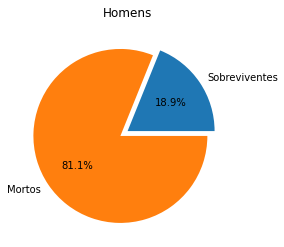

In [18]:
labels = 'Sobreviventes','Mortos'

var = data3.groupby(['Sex']).mean().Survived.male
plt.pie([var,1-var],(0.0, 0.1),labels=labels,autopct='%1.1f%%')
plt.title('Homens')
plt.show()

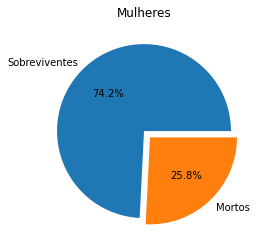

In [19]:
var = data3.groupby(['Sex']).mean().Survived.female
plt.pie([var,1-var],(0.0, 0.1),labels=labels,autopct='%1.1f%%')
plt.title('Mulheres')
plt.show()

What was the age group of passengers on the Titanic? From this age group, did more children or more adults survive? 
To answer these questions we set up the histogram below and, as expected, children were a priority in removing the ship.

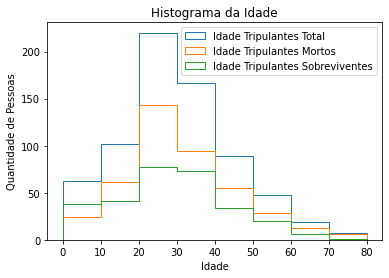

In [20]:
plt.hist(data3['Age'], bins = [0,10,20,30,40,50,60,70,80],histtype='step',label='Idade Tripulantes Total')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Histograma da Idade')

aux = data3.loc[data3['Survived']<1]
plt.hist(aux['Age'], bins = [0,10,20,30,40,50,60,70,80],histtype='step',label='Idade Tripulantes Mortos')

aux = data3.loc[data3['Survived']>0]
plt.hist(aux['Age'], bins = [0,10,20,30,40,50,60,70,80],histtype='step',label='Idade Tripulantes Sobreviventes')
plt.legend()
plt.show()

Below we see the numbers of survivors in relation to social class: The distribution of passengers reflected the social stratification of the time. The first class, at the top of the boat, for the wealthiest and most influential, the second, in the middle zone, for the middle classes; the third, for poor immigrants of various nationalities. We were also able to observe that more people from the first class survived.

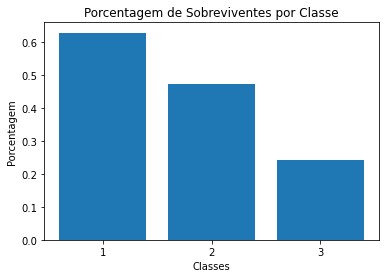

In [21]:
plt.bar(['1','2','3'],data3.groupby(['Pclass']).mean().Survived)
plt.xlabel('Classes')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Sobreviventes por Classe')
plt.show()

Through the analysis above it is clear that the sex and class factor were definitive for the survival of passengers.

In [22]:
data2 = pd.merge(data2, data1, on=['PassengerId'])

In [23]:
data2.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
data2.dropna(inplace=True)
data2['Sex'].replace(['female','male'],[0,1],inplace=True)

data3.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
data3.dropna(inplace=True)
data3['Sex'].replace(['female','male'],[0,1],inplace=True)

In [24]:
y_treino = data3['Survived']
x_treino = data3.drop('Survived',axis=1)

y_teste = data2['Survived']
x_teste = data2.drop('Survived',axis=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=200,max_depth=5)
modelo.fit(x_treino,y_treino)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

previsao = modelo.predict(x_teste)
print('Acuracia : ',accuracy_score(y_teste, previsao))
print('Precisao : ',precision_score(y_teste, previsao, average='macro'))

Acuracia :  0.8670694864048338
Precisao :  0.8746101980615255


In [27]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
variable_importance = {'importance': importances,
            'index': indices}
importances_modelo = variable_importance['importance']
indices_modelo = variable_importance['index']

In [28]:
names_index = x_teste.columns

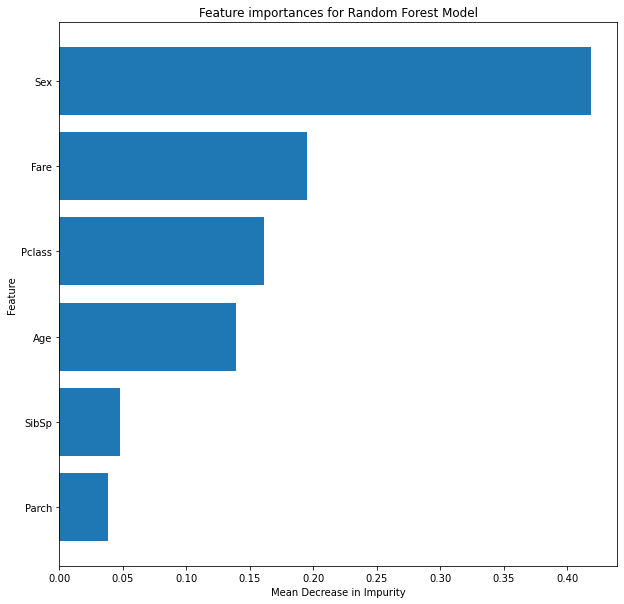

In [29]:
index = np.arange(len(names_index))
importance_desc = sorted(importances)
feature_space = []
for i in range(indices.shape[0] - 1, -1, -1):
    feature_space.append(names_index[indices[i]])
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature importances for Random Forest Model')
plt.barh(index,importance_desc,align="center")
plt.yticks(index,feature_space)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

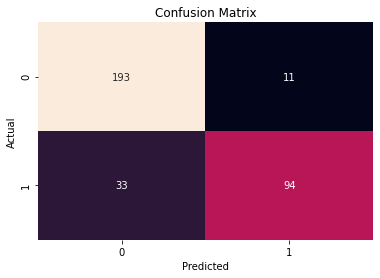

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_teste, previsao)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()